# Problem Set 2: Quantitative Macro

# Jorge Batanero

In [114]:
import numpy as np
import pandas as pd
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

##  A) Computing the Steady State

##### Consider the following closed optimal growth economy populated by a large number of identical infinitely lived households that maximize:

\begin{align}
    \mathbf{E}_0\left\{ \sum_{t=0}^\infty \beta^t u(c_t)\right\}
\end{align}

##### Over the consumption and leisure $u(c_t)=ln(c_t)$, subject to:

\begin{align}
    c_t+i_t=y_t \\
    y_t=k_t^{1-\theta}(z h_t)^\theta \\
    i_t=k_{t+1}-(1-\delta)k_t
\end{align}

##### Set labor share to $\theta=0.67$. Also, to start with, set $h_t=.31$ for all t. Population does not grow.

##### a) Compute the steady-state. Choose z to match an annual capital-output ratio of 4, and an investment-output ratio of .25.

The maximization problem can be written as follows:

\begin{equation*}
	\begin{aligned}
	& \underset{c_t, k_{t+1}}{\max}
	& &  \mathbf{E}_0\left\{ \sum_{t=0}^\infty \beta^t u(c_t)\right\} \\
	& \text{s.t.}
	& & c_t+k_{t+1}=k_t^{1-\theta}(z h_t)^\theta+(1-\delta)k_t
	\end{aligned}
	\end{equation*}
	
The Lagrangian associated to this problem:

\begin{align*}
    \mathcal{L}(c_t,k_{t+1},\lambda_t)=\mathbf{E}_0\left\{ \sum_{t=0}^\infty \beta^t u(c_t)\right\}-\lambda_t (c_t+k_{t+1}-k_t^{1-\theta}(z h_t)^\theta-(1-\delta)k_t)
\end{align*}

We can solve for the Euler equation combining the FOC's of this problem:

\begin{align}\label{c}
    \frac{\partial \mathcal{L}}{\partial c_t}=0 \to  \beta^t u'(c_t)=\lambda_t \\
    \label{k}
    \frac{\partial \mathcal{L}}{k_{t+1}}=0 \to \lambda_t=\lambda_{t+1}((1-\theta)k_{t+1}^{-\theta}(zh_t)^{\theta}+(1-\delta))
\end{align}

Using the FOC w.r.t consumption in periods t and t+1 in the FOC w.r.t to capital, we get the Euler equation:

\begin{align}\label{Euler}
u'(c_t)=\beta u'(c_{t+1})((1-\theta)k_{t+1}^{-\theta}(zh_t)^{\theta}+(1-\delta))
\end{align}

Imposing the steady state in the euler we solve for $k_{ss}$:

\begin{align}
    k_{ss}=hz\left[\frac{\beta(1-\theta)}{1-\beta(1-\delta)}\right]^{\frac{1}{\theta}}
\end{align}

We know that the ratio capital to output is 4, therefore we can normalize the output equal to 1 in the steady state, so that $k_{ss}^*=4$. We also know that the ratio investment to output is equal to 0.25, therefore $i_{ss}^*=0.25$. Putting this together we can get the depreciation rate, z and the consumption in the steady state:

\begin{align*}
    i_{ss}=k_{ss}-k_{ss}+\delta k_{ss} \to \delta=0.0625 \\
    c_{ss}=y_{ss}-i_{ss}=0.75 \\
    y_{ss}=k_{ss}^{1-\theta}(zh)^{\theta} \to z=\left(\frac{y}{k_{ss}^{1-\theta}h_{ss}^\theta}\right)^{\frac{1}{\theta}}=1.629
\end{align*}

In [115]:
# First I define the parameters that we know
θ=0.67   #labor share 
h=0.31   #labor suply 
z=1.629 # Parameter of producivity

# Now I define the equations that must hold in the Steady State and solve for it

def Steady_State(vars):
    # I set the equations such that they have to be equal to zero, we are solving for roots
    k_ss,c_ss,y_ss,β,δ=vars
    Euler_SS=β*((1-θ)*(k_ss**(-θ))*((z*h)**θ)+(1-δ))-1
    Resource_Constraint_SS=y_ss-δ*k_ss-c_ss
    Production_SS=y_ss-(k_ss**(1-θ))*((z*h)**θ)
    Cap_Out_Ratio_SS=(k_ss/y_ss)-4
    Invest_Out_Ratio_SS=((δ*k_ss)/y_ss)-0.25
    return [Euler_SS, Resource_Constraint_SS, Production_SS, Cap_Out_Ratio_SS, Invest_Out_Ratio_SS]

x0=[4,0.75,1,0.98,0.06]
#Solving for the Steady State
k_ss,c_ss,y_ss,β,δ=fsolve(Steady_State,x0) 
#Investment in steady state
i_ss=δ*k_ss
SteadyState_a={"k_ss":k_ss,"c_ss":c_ss,"y_ss":y_ss,"β":β,"δ":δ,"i_ss":i_ss}
print(SteadyState_a)

{'k_ss': 3.9983405378022554, 'c_ss': 0.749688850837957, 'y_ss': 0.9995851344505639, 'β': 0.9803921568576601, 'δ': 0.06250000000000001, 'i_ss': 0.24989628361264102}


### B) New Steady State

In [116]:

# Productivity shock
z_new=2*z

def Steady_StateB(vars):
    # I set the equations such that they have to be equal to zero, we are solving for roots
    k_ss2,c_ss2,y_ss2,β2,δ2=vars
    Euler_SS2=β2*((1-θ)*(k_ss2**(-θ))*((z_new*h)**θ)+(1-δ2))-1
    Resource_Constraint_SS2=y_ss2-δ2*k_ss2-c_ss2
    Production_SS2=y_ss2-(k_ss2**(1-θ))*((z_new*h)**θ)
    Cap_Out_Ratio_SS2=(k_ss2/y_ss2)-4
    Invest_Out_Ratio_SS2=((δ2*k_ss2)/y_ss2)-0.25
    return [Euler_SS2, Resource_Constraint_SS2, Production_SS2, Cap_Out_Ratio_SS2, Invest_Out_Ratio_SS2]

x02=[4,0.75,1,0.98,0.06]
#Solving for the Steady State
k_ss2,c_ss2,y_ss2,β2,δ2=fsolve(Steady_StateB,x02) 
#Investment in steady state
i_ss2=δ2*k_ss2
SteadyState_b={"k_ss2":k_ss2,"c_ss2":c_ss2,"y_ss2":y_ss2,"β2":β2,"δ2":δ2,"i_ss2":i_ss2}
print(SteadyState_b)

{'k_ss2': 7.996681074161963, 'c_ss2': 1.499377701669063, 'y_ss2': 1.9991702688108393, 'β2': 0.9803921568935487, 'δ2': 0.06250000000067645, 'i_ss2': 0.49979256714053205}


### C) TRANSITION

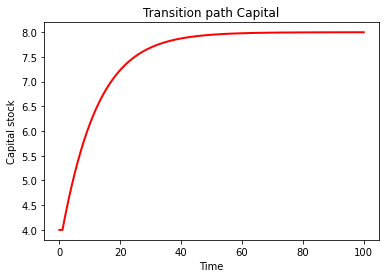

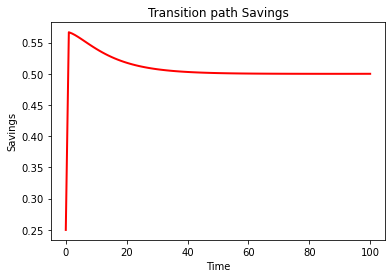

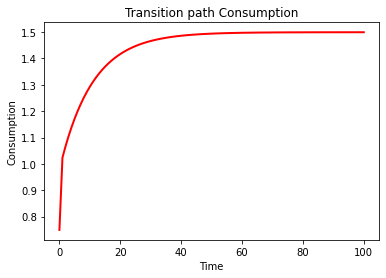

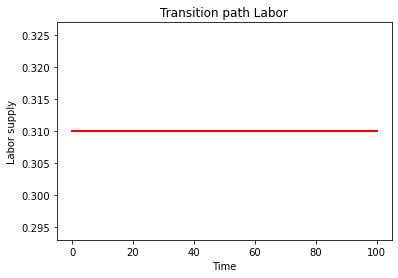

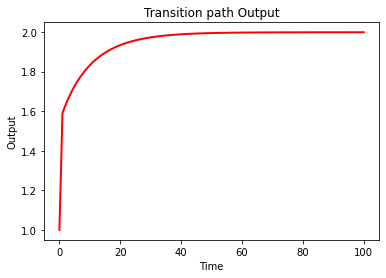

In [117]:

# Define a funtion for consumption that will help us to compute consumption at any period in terms of k
def cons(c):
    return c
# Production function:
def CobbDouglas(k,z):
    return k**(1-θ)*(z*h)**θ

n=100   #number of periods

# Here I write the Euler equation only as a function of capital.
# A solution is a sequence of capital, that satisfy the Euler equation every period.
# To solve I fix the initial and the final k
def transition(k, n=n):
    k_0=k_ss
    k_final=k_ss2
    k[0]=k_ss #Initial condition
    k[n-1]=k_ss2 #Final condition
    k_transition=np.zeros(n)
    for i in range(0,n-2):  
        if i==0:
            k_transition[i+1]=cons(CobbDouglas(k[i+1],z_new)+(1-δ)*k[i+1]-k[i+2])-β*cons(CobbDouglas(k_0,z_new)+(1-δ)*k_0-k[i+1])*(1-δ+(1-θ)*(1/(k[i+1])**(θ))*((CobbDouglas(k_0,z_new))/(k_0**(1-θ))))                               
        elif i==(n-2):
            k_transition[i+1]=cons(CobbDouglas(k[i+1],z_new)+(1-δ)*k[i+1]-k_final)-β*cons(CobbDouglas(k[i],z_new)+(1-δ)*k[i]-k[i+1])*(1-δ+(1-θ)*(1/(k[i+1])**(θ))*((CobbDouglas(k[i],z_new))/(k[i]**(1-θ))))
        else:
            k_transition[i+1]=cons(CobbDouglas(k[i+1],z_new)+(1-δ)*k[i+1]-k[i+2])-β*cons(CobbDouglas(k[i],z_new)+(1-δ)*k[i]-k[i+1])*(1-δ+(1-θ)*(1/(k[i+1])**(θ))*((CobbDouglas(k[i],z_new))/(k[i]**(1-θ))))   

    return(k_transition)
# I set the guess between the initial and the final values that are knowns 4 and 8.
x_0=np.linspace(4,8,n) 
# I solve the transition path for capital using fsolve
transition_path_k=fsolve(transition,x_0)  

#Now I use the transition path of capital to solve for the other transitions
# Transition output
transition_path_y=CobbDouglas(transition_path_k,z_new) 

#Transition savings:
transition_path_s=np.zeros(n)

for i in range(0,n-1):
        transition_path_s[i]=transition_path_k[i+1]-(1-δ)*transition_path_k[i]

transition_path_s[n-1]=transition_path_s[n-2]
#Transition consumption.
transition_path_c=transition_path_y-transition_path_s
#Transition labor  
transition_path_l=np.ones(n)*h
                        

# I add the steady state at the beggining of the transition to plot
transition_path_k=np.insert(transition_path_k,0,k_ss)
transition_path_y=np.insert(transition_path_y,0,y_ss)
transition_path_s=np.insert(transition_path_s,0,i_ss)  
transition_path_c=np.insert(transition_path_c,0,c_ss)
transition_path_l=np.insert(transition_path_l,0,h)

#Time vector
time=np.array(list(range(0,(n+1))))


#Plot Capital
fig,ax = plt.subplots()    
ax.plot(time, transition_path_k,'-', color='red', linewidth=2)   
ax.set_title('Transition path Capital')
ax.set_ylabel('Capital stock')
ax.set_xlabel('Time')
plt.show()

#Plot savings
fig,ax = plt.subplots()    
ax.plot(time, transition_path_s,'-', color='red', linewidth=2)   
ax.set_title('Transition path Savings')
ax.set_ylabel('Savings')
ax.set_xlabel('Time')
plt.show()

#Plot consumption
fig,ax = plt.subplots()    
ax.plot(time, transition_path_c,'-', color='red', linewidth=2)     
ax.set_title('Transition path Consumption')
ax.set_ylabel('Consumption')
ax.set_xlabel('Time')
plt.show()

#Plot labor
fig,ax = plt.subplots()    
ax.plot(time, transition_path_l, 'r-', linewidth=2)   
ax.set_title('Transition path Labor')
ax.set_ylabel('Labor supply')
ax.set_xlabel('Time')
plt.show()

#Plot output
fig,ax = plt.subplots()    
ax.plot(time, transition_path_y,'-', color='red', linewidth=2)   
ax.set_title('Transition path Output')
ax.set_ylabel('Output')
ax.set_xlabel('Time')
plt.show()



### D) Unexpected shock

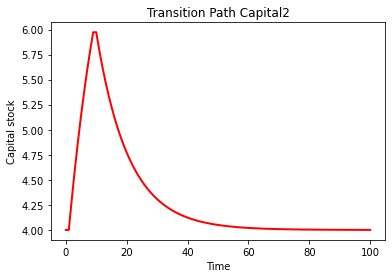

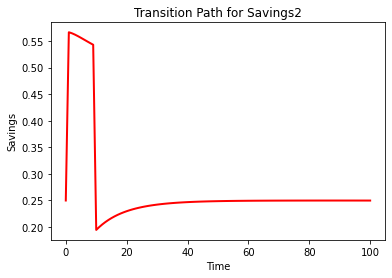

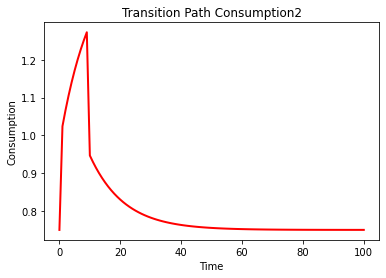

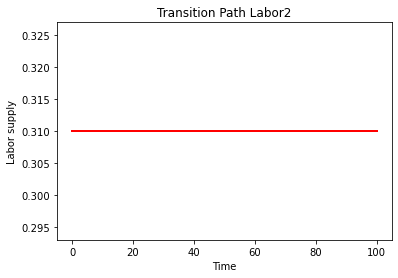

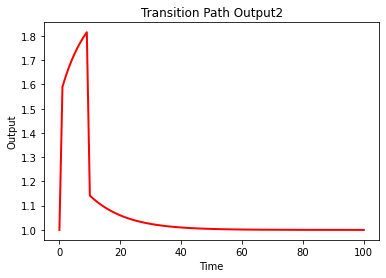

In [118]:
#The way to proceed is the same as before, but in period 10 I intrudoce the new shock

n2=91


def transition2(k, n2=n2):
    k_0=transition_path_k[9]
    k_final=k_ss
    k[0]=transition_path_k[9]
    k[n2-1]=k_ss
    k_transition2=np.zeros(n2)
    for i in range(0,n2-2):
        if i==0:
            k_transition2[i+1]=cons(CobbDouglas(k[i+1],z)+(1-δ)*k[i+1]-k[i+2])-β*cons(CobbDouglas(k_0,z)+(1-δ)*k_0-k[i+1])*(1-δ+(1-θ)*(1/(k[i+1])**(θ))*((CobbDouglas(k_0,z))/(k_0**(1-θ))))                               
        elif i==(n2-2):
            k_transition2[i+1]=cons(CobbDouglas(k[i+1],z)+(1-δ)*k[i+1]-k_final)-β*cons(CobbDouglas(k[i],z)+(1-δ)*k[i]-k[i+1])*(1-δ+(1-θ)*(1/(k[i+1])**(θ))*((CobbDouglas(k[i],z))/(k[i]**(1-θ))))
        else:
            k_transition2[i+1]=cons(CobbDouglas(k[i+1],z)+(1-δ)*k[i+1]-k[i+2])-β*cons(CobbDouglas(k[i],z)+(1-δ)*k[i]-k[i+1])*(1-δ+(1-θ)*(1/(k[i+1])**(θ))*((CobbDouglas(k[i],z))/(k[i]**(1-θ))))   

    return(k_transition2)


x_02=np.linspace(8,4,n2)
transition_path_k2=fsolve(transition2,x_02)

#Once I have the transition path for capital I solve for the rest of transition paths.
transition_path_y2=CobbDouglas(transition_path_k2,z) #output

transition_path_s2=np.zeros(n2)

for i in range(0,n2-1):
        transition_path_s2[i]=transition_path_k2[i+1]-(1-δ)*transition_path_k2[i]

transition_path_s2[n2-1]=transition_path_s2[n2-2] #savings

transition_path_c2=transition_path_y2-transition_path_s2 #consumption

transition_path_l2=np.ones(n2)*h #labor


#Finally, add periods 0 to 9 of part c) vectors to get the complete transition dynamics:
transition_path_k2=np.concatenate((transition_path_k[0:10],transition_path_k2))   
transition_path_y2=np.concatenate((transition_path_y[0:10],transition_path_y2)) 
transition_path_s2=np.concatenate((transition_path_s[0:10],transition_path_s2)) 
transition_path_c2=np.concatenate((transition_path_c[0:10],transition_path_c2)) 
transition_path_l2=np.concatenate((transition_path_l[0:10],transition_path_l2))



#And plot results:
#Plot Capital
fig,ax = plt.subplots()    
ax.plot(time, transition_path_k2,'-', color='red', linewidth=2)   
ax.set_title('Transition Path Capital2')
ax.set_ylabel('Capital stock')
ax.set_xlabel('Time')
plt.show()

#Plot savings
fig,ax = plt.subplots()    
ax.plot(time, transition_path_s2,'-', color='red', linewidth=2)   
ax.set_title('Transition Path for Savings2')
ax.set_ylabel('Savings')
ax.set_xlabel('Time')
plt.show()

#Plot consumption
fig,ax = plt.subplots()    
ax.plot(time, transition_path_c2,'-', color='red', linewidth=2)     
ax.set_title('Transition Path Consumption2')
ax.set_ylabel('Consumption')
ax.set_xlabel('Time')
plt.show()

#Plot labor
fig,ax = plt.subplots()    
ax.plot(time, transition_path_l2, 'r-', linewidth=2)   
ax.set_title('Transition Path Labor2')
ax.set_ylabel('Labor supply')
ax.set_xlabel('Time')
plt.show()

#Plot output
fig,ax = plt.subplots()    
ax.plot(time, transition_path_y2,'-', color='red', linewidth=2)   
ax.set_title('Transition Path Output2')
ax.set_ylabel('Output')
ax.set_xlabel('Time')
plt.show()

## 2. Solve the optimal COVID-19 lockdown model posed in the slides.

First I'm going to derive the equations of the slides analiticaly.

The maximization problem that the social planner face is the following:

\begin{equation*}
	\begin{aligned}
	& \underset{H_f, H_{nf}}{\max}
	& &  Y(H_f,H_{nf})-\kappa_f H_f -\kappa_{nf} H_{nf}-\omega D \\
	& \text{s.t.}
	& & H_f+H_{nf}\leq N \\
    &&& Y(H_f,H_{nf})=(A_f H_f^{\frac{\rho-1}{\rho}}+c(TW)A_f H_{nf}^{\frac{\rho-1}{\rho}})^{\frac{\rho}{\rho-1}} \\
    &&& D=(1-\gamma) \beta (HC)\frac{i_0 H_f^2}{N}
	\end{aligned}
	\end{equation*}
	
The Lagrangian associated to this problem:

\begin{align*}
    \mathcal{L}(H_f,H_{nf},\lambda)=(A_f H_f^{\frac{\rho-1}{\rho}}+c(TW)A_f H_{nf}^{\frac{\rho-1}{\rho}})^{\frac{\rho}{\rho-1}})-\kappa_f H_f -\kappa_{nf} H_{nf}-\omega \left((1-\gamma) \beta (HC)\frac{i_0 H_f^2}{N}\right) -\lambda (H_f+H_{nf}-N)
\end{align*}

I'm going to focus in the case of $\lambda=0$ as in the slides, I'm going to solve the FOC's with $\lambda=0$:

\begin{align}
    \frac{\partial \mathcal{L}}{\partial H_f}=0 \to (A_f H_f^{\frac{\rho-1}{\rho}}+c(TW)A_f H_{nf}^{\frac{\rho-1}{\rho}})^{\frac{1}{\rho-1}}A_fH_f^{\frac{-1}{\rho}}=\kappa_f+ 2\omega (1-\gamma) \beta (HC)\frac{i_0 H_f}{N} \\
    \frac{\partial \mathcal{L}}{H_{nf}}=0 \to (A_f H_f^{\frac{\rho-1}{\rho}}+c(TW)A_f H_{nf}^{\frac{\rho-1}{\rho}})^{\frac{1}{\rho-1}} c(TW)A_fH_{nf}^{\frac{-1}{\rho}}= \kappa_{nf}
\end{align}

Text(33.0, 0.5, '$β(HC)$')

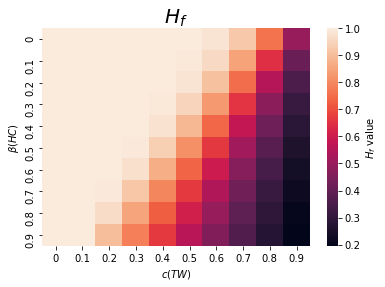

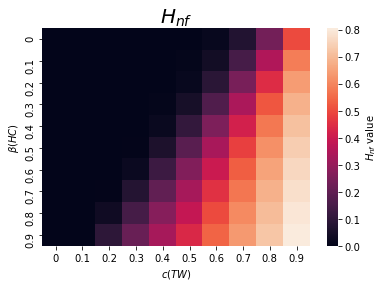

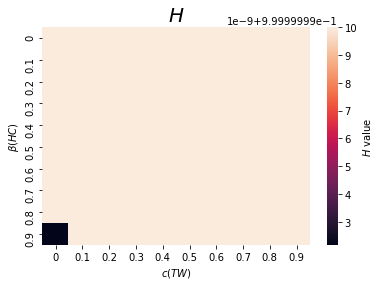

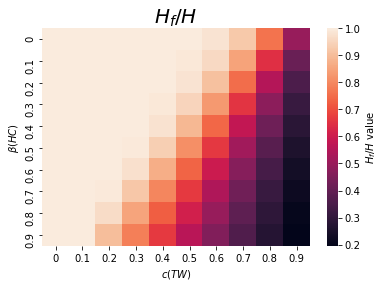

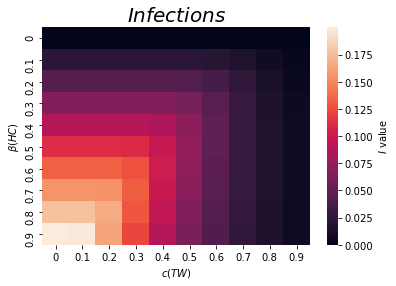

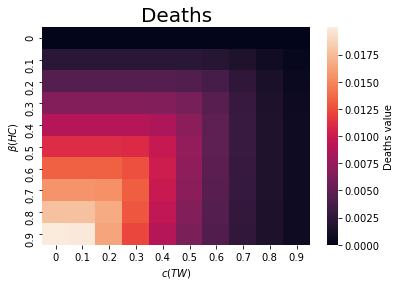

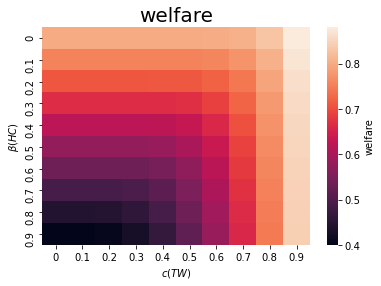

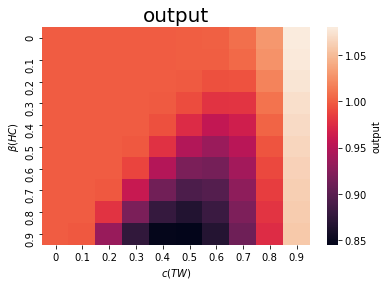

In [149]:
# For part b just change the parameter ρ =10 and ω=100
from scipy.optimize import minimize     

# First I define the parameters that are known 
A_f=1
A_nf=1
κ_f=0.2
κ_nf=0.2
γ=0.9
i_0=0.2
N=1
ω=20
ρ=1.1
n=10

# Define the function that I'm going to minimize, that's why I multiply by -1 
    
Objective_function =lambda h:-1* ((A_f*h[0]**((ρ-1)/ρ)+grid[j]*A_nf*h[1]**((ρ-1)/ρ))**(ρ/(ρ-1)) - κ_f*h[0]-κ_nf*h[1] - ω*((1-γ)*grid[i]*(i_0*h[0]**2/N))) 

# Define the constraint

constraints= ({'type':'ineq','fun': lambda h: N - h[0] - h[1] })

# Generate the grid for β and c(TW)

grid = np.linspace(0,1,n)           
# Array of results for H_f
H_f = np.zeros(shape=(n,n))    
# Array of results for H_nf
H_nf = np.zeros(shape=(n,n))     

for i in range(n):
        for j in range(n):
            x0 = [0.5,0.5]         # Initial guess
            bound = [(0,1),(0,1)]    # Restrict the opitmal values to be between 0 and 1
            optimal = minimize(Objective_function,x0,constraints=constraints,bounds=bound)      # solve
            H_f[i][j] = optimal.x[0]                      # Store the solution of h_f
            H_nf[i][j] = optimal.x[1]                      # Store the solution of h_nf
            
#Using h_f and h_nf compute the rest of the variables

## Output: 

output = np.zeros(shape=(n,n))    #Array for results of output

for i in range (n):
    for j in range(n):
        output[i][j]= (A_f*(H_f[i][j])**((ρ-1)/ρ)+grid[j]*A_nf*(H_nf[i][j])**((ρ-1)/ρ))**(ρ/(ρ-1))

## H:

H = H_f +H_nf
    
## Hf/H:

H_f_H = H_f/H

## Infections: 

I = np.zeros(shape=(n,n))    #Array for results of infections
for i in range(n):
    for j in range(n):
        I[i][j] = H_f[i][j]**2*i_0*grid[i]

## Deaths: 

D  = (1-γ)*I

welfare = np.zeros(shape=(n,n))
# Welfare:
for i in range (n):
    for j in range(n):
         welfare[i][j]= (A_f*(H_f[i][j])**((ρ-1)/ρ)+grid[j]*A_nf*(H_nf[i][j])**((ρ-1)/ρ))**(ρ/(ρ-1))-κ_f*H_f[i][j]-κ_nf*H_nf[i][j] - ω*((1-γ)*grid[i]*(i_0*H_f[i][j]**2/N)) 

# Plot the results using a heatmap

import seaborn as sns

values = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   # Determine the values of the axis


fig, ax = plt.subplots()
sns.heatmap(H_f,cbar_kws={"label":"$H_f$ value"},xticklabels =values,yticklabels=values)
plt.title("$H_f$",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

fig, ax = plt.subplots()
sns.heatmap(H_nf,cbar_kws={"label":"$H_{nf}$ value"},xticklabels =values,yticklabels=values)
plt.title("$H_{nf}$",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")


fig, ax = plt.subplots()
sns.heatmap(H,cbar_kws={"label":"$H$ value"},xticklabels =values,yticklabels=values)
plt.title("$H$",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

fig, ax = plt.subplots()
sns.heatmap(H_f_H,cbar_kws={"label":"$H_f/H$ value"},xticklabels =values,yticklabels=values)
plt.title("$H_f/H$",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

fig, ax = plt.subplots()
sns.heatmap(I,cbar_kws={"label":"$I$ value"},xticklabels =values,yticklabels=values)
plt.title("$Infections$",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

fig, ax = plt.subplots()
sns.heatmap(D,cbar_kws={"label":"Deaths value"},xticklabels =values,yticklabels=values)
plt.title("Deaths",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

fig, ax = plt.subplots()
sns.heatmap(welfare,cbar_kws={"label":"welfare"},xticklabels =values,yticklabels=values)
plt.title("welfare",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

         
fig, ax = plt.subplots()
sns.heatmap(output,cbar_kws={"label":"output"},xticklabels =values,yticklabels=values)
plt.title("output",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")
    